In [3]:
import os
import glob
import sys
import vtk

import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
from vtk.util.numpy_support import vtk_to_numpy

In [4]:
#Include depicted data...
#Case 2 -------------------------- Diameter import
data_Wave= pd.read_csv("./Case_Liu/Wave_Case2.csv", header=None) # Wave_Case2.csv
data_TAB= pd.read_csv("./Case_Liu/TAB_Case2.csv", header=None) # TAB_Case2.csv
data_PDPA= pd.read_csv("./Case_Liu/PDPA_Case2.csv", header=None) # PDPA_Case2.csv

#Case 3 -------------------------- Diameter import
TAB_Case3= pd.read_csv("./Case_Liu/TAB_Case3.csv", header=None) # TAB_Case3.csv
KH_Case3= pd.read_csv("./Case_Liu/Wave_Case3.csv", header=None) # SMD_KH_Case3Experiment.csv
PDPA_Case3= pd.read_csv("./Case_Liu/PDPA_Case3.csv", header=None) # PDPA_Case3.csv

#Case 4 -------------------------- Single droplet breakup
data_C4_SingleD= pd.read_csv("./Case_Liu/Case_4_Single_D.csv", header=None) # Case_4_Single_D.csv
data_C4_SingleRe= pd.read_csv("./Case_Liu/Case4_Single_Re.csv", header=None) # Case4_Single_Re.csv

#Case 2 ------------------------ Trajectory import
TAB_amp00_Traject_Case2= pd.read_csv("./Case_Liu/Trajectories/Case2_TAB_amp0_0.csv", header=None) # Trajectory_TAB_Case2.csv
Wave_Traject_Case2= pd.read_csv("./Case_Liu/Trajectories/Case2_wave_Dynamic.csv", header=None) # Trajectory_Wave_Case2.csv
Wave_st_Traject_Case2= pd.read_csv("./Case_Liu/Trajectories/Case2_Wave_Standard.csv", header=None) # Trajectory_Wave_Case2.csv
Traject_Exp_Case2= pd.read_csv("./Case_Liu/Trajectories/Case2_Experiment.csv", header=None) # Trajectory_Experiment_Case2.csv

#Case 4 -------------------------- Trajectory import
TAB_amp02_Traject_Case4= pd.read_csv("./Case_Liu/Trajectories/Case4_TAB_amp0_2.csv", header=None) # TAB_Traject_Case4.csv
TAB_amp00_Traject_Case4= pd.read_csv("./Case_Liu/Trajectories/Case4_TAB_amp0_0.csv", header=None) # TAB_sc_Traject_Case4.csv
Wave_st_Traject_Case4= pd.read_csv("./Case_Liu/Trajectories/Case4_Wave_Standard.csv", header=None) # Trajectory_Wave_Case4.csv
Wave_Traject_Case4= pd.read_csv("./Case_Liu/Trajectories/Case4_Wave_Dynamic.csv", header=None) # Trajectory_Wave_Case4.csv
Traject_Exp_Case4= pd.read_csv("./Case_Liu/Trajectories/Case4_Experiment.csv", header=None) # Trajectory_Experiment_Case4.csv

#Case 4 -------------------------- ReD import
data_Wave= pd.read_csv("./Case_Liu/Wave_Case2.csv", header=None) # Wave_Case2.csv
ReX= pd.read_csv("./Case_Liu/Trajectories/ReX.csv", header=None) 


In [5]:
fdir = "../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud"
#check if directory exists
if not os.path.exists(fdir):
    print('Error: Path does not exist:', fdir)
    sys.exit()

In [6]:
nd = 1
# create reader
reader = vtk.vtkXMLPolyDataReader()
# -------------------------------------------------------------------
points =[]
point_data=[]
point_d = []
point_d0 = []; sigma=[]; density=[]; dyn_viscosity=[];Reynolds=[];
#loop over all vtp files
for fname in sorted(glob.glob(os.path.join(fdir, '*.vtp'))):
    print('Reading:', fname)
    reader.SetFileName(fname)
    reader.Update()

    data = (reader.GetOutput())
    point_data.append(data.GetPointData())
    point_d.append(vtk_to_numpy((data.GetPointData()).GetArray('d'))[nd-1:nd])
    point_d0.append(vtk_to_numpy((data.GetPointData()).GetArray('d0'))[nd-1:nd])    
    sigma.append(vtk_to_numpy((data.GetPointData()).GetArray('sigma'))[nd-1:nd])
    dyn_viscosity.append(vtk_to_numpy((data.GetPointData()).GetArray('mu'))[nd-1:nd])
    density.append(vtk_to_numpy((data.GetPointData()).GetArray('rho'))[nd-1:nd])
    Reynolds.append(vtk_to_numpy((data.GetPointData()).GetArray('Re'))[nd-1:nd])
    points.append((vtk_to_numpy(data.GetPoints().GetData()))[nd-1:nd])
    

Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5110.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5125.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5140.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5155.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5170.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5185.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5200.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5215.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5230.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5245.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5260.vtp
Reading: ../secondaryBreakupBenz

In [7]:
px=[]
py=[]
pz=[]
for i in range(0, len(points)):
    px.append(np.array(points[i][:,0]))
    py.append(np.array(points[i][:,1]))
    pz.append(np.array(points[i][:,2]))

In [8]:
diameter =[]
for i in range(0, len(points)):
    diameter.append(np.array(point_d[i]))   
    diameter = [arr for arr in diameter if arr.size > 0]

In [9]:
# Perform concatenation
diameter_total = np.concatenate( diameter, axis=0 )
px_total = np.concatenate(px, axis=0)
py_total = np.concatenate(py, axis=0)
pz_total = np.concatenate(pz, axis=0)

c = np.column_stack((py_total, pz_total,diameter_total))
c_sorted = c[np.argsort(c[:, 0])]

(0.042, 0.056)

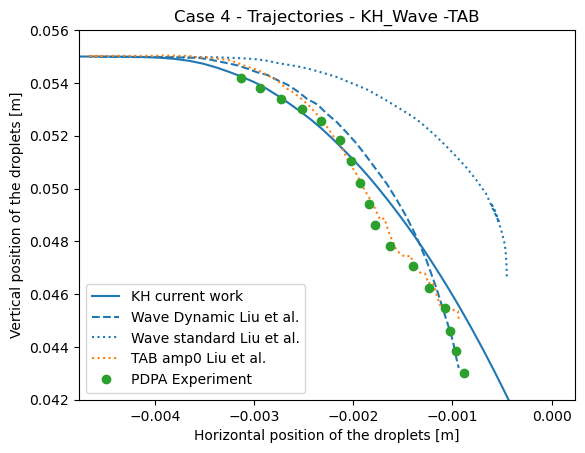

In [10]:
plt.plot(c_sorted[:,0],c_sorted[:,1], label='KH current work')
plt.plot(Wave_Traject_Case4.iloc[:,0], Wave_Traject_Case4.iloc[:,1], '--', c='C0', label='Wave Dynamic Liu et al.')
plt.plot(Wave_st_Traject_Case4.iloc[:,0], Wave_st_Traject_Case4.iloc[:,1], ':', c='C0', label='Wave standard Liu et al.')
plt.plot(TAB_amp00_Traject_Case4.iloc[:,0],TAB_amp00_Traject_Case4.iloc[:,1], ':', c='C1', label='TAB amp0 Liu et al.')
plt.plot(Traject_Exp_Case4.iloc[:,0], Traject_Exp_Case4.iloc[:,1], 'o', c='C2',label='PDPA Experiment')
plt.legend()
plt.title('Case 4 - Trajectories - KH_Wave -TAB')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Vertical position of the droplets [m]')
plt.xlim(-0.0047625, 0.0002375)
plt.ylim(0.042,0.056)

In [11]:
# Computing the Sauter mean diameter for a specific amount of segments
d3 = pow(c_sorted[:,2],3)
sigma_d3 = sum(d3)
d2 = pow(c_sorted[:,2],2)
sigma_d2 = sum(d2)

 
splitedSize = round(len(c_sorted[:,2])/50)
d3_split = [d3[x:x+splitedSize] for x in range(0, len(d3), splitedSize)]
d2_split = [d2[x:x+splitedSize] for x in range(0, len(d2), splitedSize)]
d_avgsplit = [c_sorted[:,2][x:x+splitedSize] for x in range(0, len(c_sorted[:,2]), splitedSize)]
c_shortx  = [c_sorted[:,0][x:x+splitedSize] for x in range(0, len(c_sorted[:,0]), splitedSize)]
c_shorty  = [c_sorted[:,1][x:x+splitedSize] for x in range(0, len(c_sorted[:,1]), splitedSize)]

In [12]:
d32=[];c_avgx =[];c_avgy =[];d_avg =[]

for i in range(0, len(c_shortx)):
    d32.append(sum(d3_split[i])/sum(d2_split[i]))
    c_avgx.append(sum(c_shortx[i])/(len(c_shortx[i])))
    c_avgy.append(sum(c_shorty[i])/(len(c_shorty[i])))
    d_avg.append(sum(d_avgsplit[i])/(len(d_avgsplit[i])))

(0.042, 0.055)

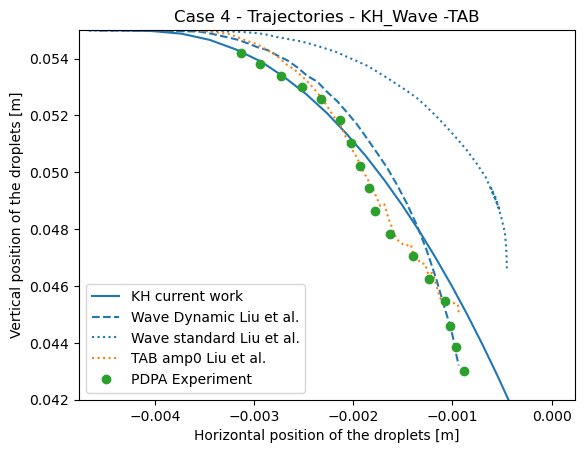

In [13]:
plt.plot(c_avgx,c_avgy, label='KH current work')
plt.plot(Wave_Traject_Case4.iloc[:,0], Wave_Traject_Case4.iloc[:,1], '--', c='C0', label='Wave Dynamic Liu et al.')
plt.plot(Wave_st_Traject_Case4.iloc[:,0], Wave_st_Traject_Case4.iloc[:,1], ':', c='C0', label='Wave standard Liu et al.')
plt.plot(TAB_amp00_Traject_Case4.iloc[:,0],TAB_amp00_Traject_Case4.iloc[:,1], ':', c='C1', label='TAB amp0 Liu et al.')
plt.plot(Traject_Exp_Case4.iloc[:,0], Traject_Exp_Case4.iloc[:,1], 'o', c='C2',label='PDPA Experiment')
plt.legend()
plt.title('Case 4 - Trajectories - KH_Wave -TAB')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Vertical position of the droplets [m]')
plt.xlim(-0.0047625, 0.0002375)
plt.ylim(0.042,0.055)

(-0.0047625, 0.0002375)

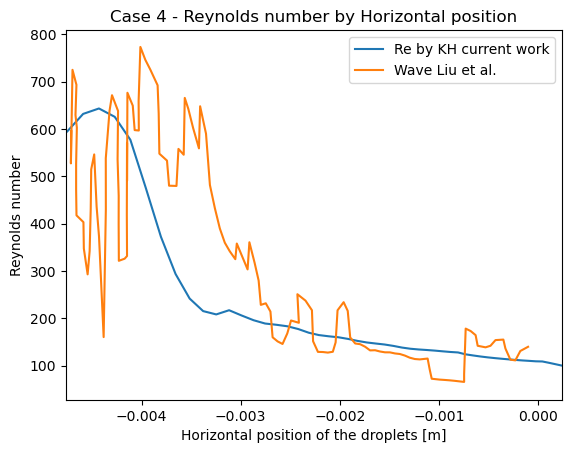

In [14]:
Reynolds = [arr for arr in Reynolds if arr.size > 0]
plt.plot(c_sorted[:,0], Reynolds, label='Re by KH current work')
plt.plot(ReX.iloc[:,0],ReX.iloc[:,1], '-', label='Wave Liu et al.')
plt.legend()
plt.title('Case 4 - Reynolds number by Horizontal position')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Reynolds number')
plt.xlim(-0.0047625,0.0002375)

(-0.0047625, 0.0002375)

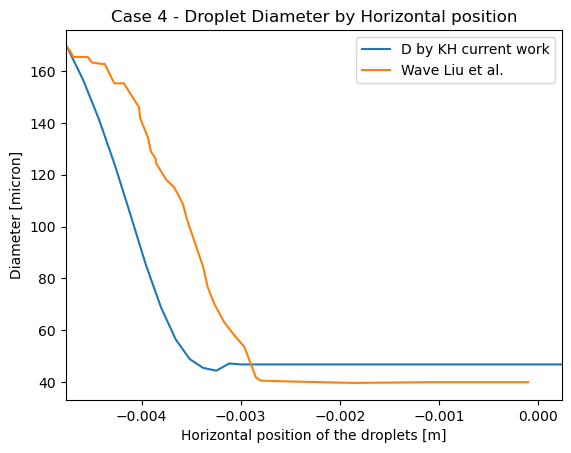

In [15]:
plt.plot(c_sorted[:,0], np.array(diameter_total) *1e6, label='D by KH current work')
plt.plot(data_C4_SingleD.iloc[:,0]-0.0047625,data_C4_SingleD.iloc[:,1], '-', label='Wave Liu et al.')
plt.legend()
plt.title('Case 4 - Droplet Diameter by Horizontal position')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Diameter [micron]')
plt.xlim(-0.0047625,0.0002375)